# CS235 Fall 2024 Course Project

Name: Rona Antonio and Mohamed Martino

Student ID: 862546158, 862463603

## Introduction
In this project, a number of data
mining techniques that we cover in this class will be implemented and applied to a real-world imbalanced
dataset.

**Dataset:** Wisconsin Breast Cancer Diagnostic dataset from the UCI data repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

## Setup

1. Create new python environment for the project

- This is not necessary on Google Colab but a good practice on your local machine

2. Install the required packages

In [1]:
# !pip install ucimlrepo
!pip install ucimlrepo

## Imports

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import itertools, collections
import numpy as np
import pandas as pd

from ucimlrepo import fetch_ucirepo


from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import f1_score, accuracy_score

import warnings

## Load Data

In [3]:
# Fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# Metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

X

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Number of Samples: 569 – 569 different cases (rows), each representing a person with either benign or malignant breast cancer.

Number of Features: 30 – Each 30 cases have different measurements (columns) related to the breast tumor. These features describe things like the size, shape, and texture of the tumor.


## Exploratory Data Analysis (EDA)

### Pairwise correlation between features

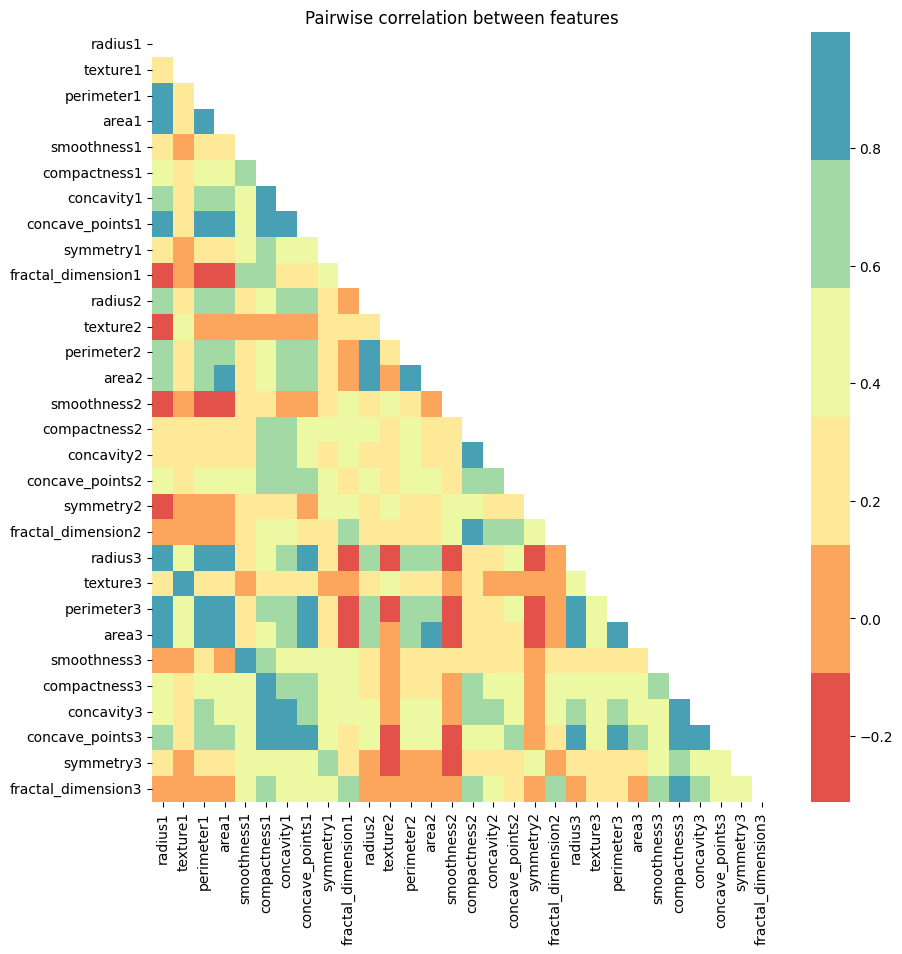

In [4]:
correlation = X.corr()

fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(correlation, annot=False, mask=np.triu(correlation),
            cmap=sns.color_palette("Spectral"))
ax.set_title("Pairwise correlation between features")
plt.show()

### Class Counts

In [5]:
print(collections.Counter(y['Diagnosis']))

Counter({'B': 357, 'M': 212})


### Class-wise features distributions

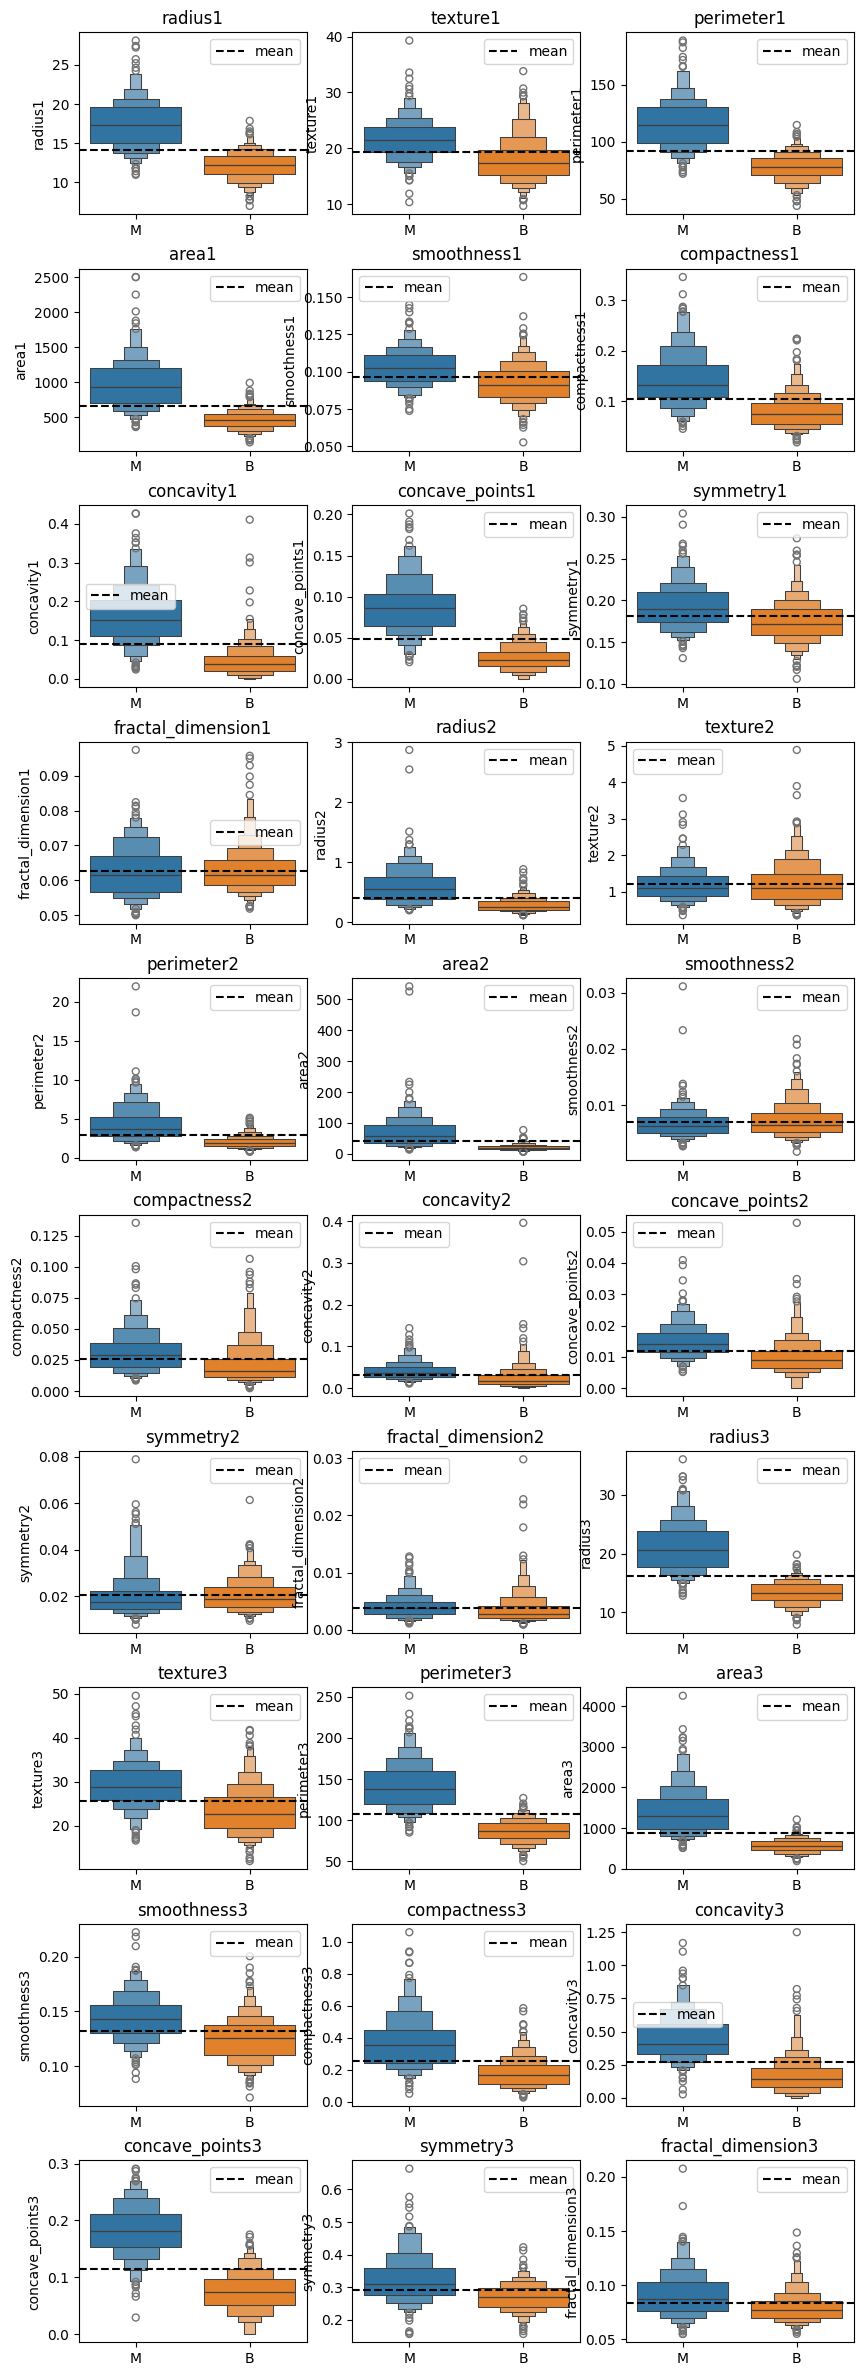

In [6]:
plt.figure(figsize=(10,30))

for i,j in itertools.zip_longest(list(X.columns), range(len(list(X.columns)))):
  plt.subplot(10,3,j+1)
  sns.boxenplot(x=y['Diagnosis'], y=X[i], hue=y['Diagnosis'])
  plt.title(i)
  plt.xlabel('')
  plt.subplots_adjust(hspace=.3)
  plt.axhline(X[i].mean(), linestyle="dashed", color='k', label='mean')
  plt.legend(loc='best')

# Phase 1 - Supervised Techniques

## Q1 - Implementing simple classifiers (Rona)

I created two classifiers from scratch for Question 1: Decision Tree and Naive Bayes.
I converted the labels binary (Benign = 0; Malignant = 1).

To preserve the class distribution, stratified sampling was used to divide the dataset into training and testing sets (80% train, 20% test).Using information gain as the splitting criterion, I constructed a decision tree classifier. This approach chooses the optimal feature and threshold at each node and computes entropy to gauge the "purity" of the split.

I constructed a Naive Bayes classifier for continuous features that assumes a Gaussian distribution. Each class's likelihood is calculated, and the highest posterior probability is used to make predictions.

5-fold stratified cross-validation was the method I used to assess both models' performance.
To determine how well each model manages the class imbalance, I took track of the F1 scores across the folds.

To see how well both models performed, I plotted their average F1 scores as error bars with the standard deviation.

I was able to compare the classifiers' efficacy and comprehend how they handle this particular dataset due to this method.

Reference: Han, J., Kamber, M., & Pei, J. (2011). Data Mining: Concepts and Techniques. (Ch. 8).

In [7]:
# features (X) and labels (y)
X = breast_cancer_wisconsin_diagnostic.data.features.values
y = breast_cancer_wisconsin_diagnostic.data.targets

# Converting 'Diagnosis' column to binary (M = 1, B = 0)
y_bin = np.where(y == 'M', 1, 0).ravel()  # this is to change dimention to 1D

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [8]:
# Decision Tree Classifier (Information Gain)
class DecisionTreeClassifier:
    def __init__(self, max_depth=50, min_samples_split=2):
        # longest path from root to leaf
        self.max_depth = max_depth
        # minimum samples required to split a node
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        class_weights = np.ones_like(y)
        self.tree = self.build_tree(X, y, class_weights)

    def build_tree(self, X, y, class_weights, depth=0):
        n_samples, n_features = X.shape

        # check if the stopping criteria met:
        # Respectively ...
        # 1. max depth reached
        # 2. all samples have the same label
        # 3. not enough samples
        if depth >= self.max_depth or len(np.unique(y)) == 1 or n_samples < self.min_samples_split:
            return np.bincount(y).argmax()

        # find the best split and threshold to split on.
        best_feature, best_threshold = self.best_split(X, y, class_weights)
        if best_feature is None:
            # return the most common class label
            return np.bincount(y).argmax()

        # define the two children nodes
        left_idxs = X[:, best_feature] <= best_threshold
        right_idxs = X[:, best_feature] > best_threshold

        # grow the tree recursively
        left_subtree = self.build_tree(X[left_idxs], y[left_idxs], class_weights[left_idxs], depth + 1)
        right_subtree = self.build_tree(X[right_idxs], y[right_idxs], class_weights[right_idxs], depth + 1)

        decision_node = {
            'feature': best_feature,
            'threshold': best_threshold,
            'left': left_subtree,
            'right': right_subtree
            }

        return decision_node

    def best_split(self, X, y, class_weights):
        best_gain = -1
        split_idx = None
        split_threshold = None

        n_samples, n_features = X.shape

        # go through all features.
        for feature_idx in range(n_features):
            X_column = X[:, feature_idx]

            thresholds = np.unique(X_column)
            for threshold in thresholds:
                # split the data for the current feature and threshold
                left_idxs = X_column <= threshold
                right_idxs = X_column > threshold

                # make sure there are samples in both nodes
                if len(left_idxs) > 0 and len(right_idxs) > 0:
                    gain = self.information_gain(y, y[left_idxs], y[right_idxs])

                    # update best gain, feature, and threshold if gain is better
                    if gain > best_gain:
                        best_gain = gain
                        split_idx = feature_idx
                        split_threshold = threshold
        return split_idx, split_threshold

    def information_gain(self, y, left_y, right_y):
        """
        week 2: supervised learning (decision trees)
        """

        n = len(y)

        # entropy before the split
        entropy_before = self.entropy(y)
        # entropy after the split for the left and right nodes
        entropy_left = self.entropy(left_y)
        entropy_right = self.entropy(right_y)

        # avg entropy of the children nodes
        # [p(left) * H(left) + p(right) * H(right)]
        weighted_avg_entropy = (len(left_y) / n) * entropy_left + (len(right_y) / n) * entropy_right

        # info gain is: H(parent) - avg(H(children))
        info_gain = entropy_before - weighted_avg_entropy
        return info_gain


    def entropy(self, y):
        # entropy formula requires relative frequencies
        hist = np.bincount(y)
        proportions = hist / len(y)

        # entropy formula
        entropy = -np.sum([p * np.log2(p) for p in proportions if p > 0])
        return entropy

    def traverse_tree(self, x, node):

        if isinstance(node, dict):
            # decide whether to go left or right
            feature = node['feature']
            threshold = node['threshold']

            if x[feature] <= threshold:
                return self.traverse_tree(x, node['left'])
            else:
                return self.traverse_tree(x, node['right'])
        else:
            # if the node is a leaf node, return the class label
            return node

    def predict(self, X):
        # for each row, we will traverse the tree to get a prediction
        prediction = np.array([self.traverse_tree(x, self.tree) for x in X])
        return prediction

In [9]:
# Naive Bayes Classifier (Gaussian modeling for continuous features)
class NaiveBayesClassifier:
    def __init__(self):
      # placeholders for class data
        self.classes = None
        self.mean = None
        self.var = None
        self.priors = None

    def fit(self, X, y):
       # set up arrays for mean, variance, and priors per class
        self.classes = np.unique(y)
        n_features = X.shape[1]
        self.mean = np.zeros((len(self.classes), n_features), dtype=np.float64)
        self.var = np.zeros((len(self.classes), n_features), dtype=np.float64)
        self.priors = np.zeros(len(self.classes), dtype=np.float64)

        # calculate mean, variance, and prior for each class
        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.var[idx, :] = X_c.var(axis=0)
            self.priors[idx] = X_c.shape[0] / float(X.shape[0])

    def _gaussian_pdf(self, class_idx, x):
       # gaussian PDF for each feature
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def _predict_single(self, x):
      # calculate the posterior probability for each class
        posteriors = []
        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            class_conditional = np.sum(np.log(self._gaussian_pdf(idx, x)))
            posterior = prior + class_conditional
            posteriors.append(posterior)
             # return the class with the highest posterior probability
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
      # predict classes for input samples
        return np.array([self._predict_single(x) for x in X])

In [10]:
def train_models_k_folds(X_train, y_train, X_test, y_test, model, skf, verbose=True):

    # Train Decision Tree with Stratified K-Fold Cross-Validation and calculate F1 scores
    f1_scores_list = []
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
        X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
        y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

        model.fit(X_fold_train, y_fold_train)
        val_preds = model.predict(X_fold_val)
        fold_f1 = f1_score(y_fold_val, val_preds)
        f1_scores_list.append(fold_f1)
        print(f"Fold {fold + 1} F1 Score: {fold_f1:.2f}")

    mean_f1 = np.mean(f1_scores_list)
    std_f1 = np.std(f1_scores_list)


    # Train on the entire training set and evaluate on the test set
    model.fit(X_train, y_train)
    y_test_preds = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_preds)
    test_f1 = f1_score(y_test, y_test_preds)

    if verbose:
        print(f"Mean F1 Score: {mean_f1:.2f}, Standard Deviation: {std_f1:.2f}")
        print(f"Test Set Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}")

    return mean_f1, std_f1, test_accuracy, test_f1

In [11]:
DecisionTreeModel = DecisionTreeClassifier()
NaiveBayesModel = NaiveBayesClassifier()

# Set up StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


print('Decision Tree Classifier')
dt_mean_f1, dt_std_f1, dt_test_accuracy, dt_test_f1 = train_models_k_folds(
    X_train,
    y_train,
    X_test,
    y_test,
    DecisionTreeModel,
    skf,
    verbose=True
    )

print("Naive-Bayes\n")
nb_mean_f1, nb_std_f1, nb_test_accuracy, nb_test_f1 = train_models_k_folds(
    X_train,
    y_train,
    X_test,
    y_test,
    NaiveBayesModel,
    skf,
    verbose=True
    )

Decision Tree Classifier
Fold 1 F1 Score: 0.86
Fold 2 F1 Score: 0.89
Fold 3 F1 Score: 0.91
Fold 4 F1 Score: 0.87
Fold 5 F1 Score: 0.91
Mean F1 Score: 0.89, Standard Deviation: 0.02
Test Set Accuracy: 0.94, F1 Score: 0.91
Naive-Bayes

Fold 1 F1 Score: 0.94
Fold 2 F1 Score: 0.97
Fold 3 F1 Score: 0.89
Fold 4 F1 Score: 0.88
Fold 5 F1 Score: 0.91
Mean F1 Score: 0.92, Standard Deviation: 0.03
Test Set Accuracy: 0.92, F1 Score: 0.89


<ipython-input-9-d9780fd7f216>:38: RuntimeWarning: divide by zero encountered in log
  class_conditional = np.sum(np.log(self._gaussian_pdf(idx, x)))
<ipython-input-9-d9780fd7f216>:38: RuntimeWarning: divide by zero encountered in log
  class_conditional = np.sum(np.log(self._gaussian_pdf(idx, x)))


With a 94% test accuracy and an F1 score of 0.91, the Decision Tree obtained an average F1 score of 0.89 over the five folds. This model performed consistently, indicating stability and good data handling.Although it was more unpredictable between folds, the Naive Bayes classifier had a little higher average F1 score of 0.92. It achieved 92% accuracy and an F1 score of 0.89 on the test set. Although it was marginally less consistent because of its independence assumptions, this model also did well.Both models handled the unbalanced dataset well overall, but the Decision Tree performed somewhat better, giving it a good option for this task.

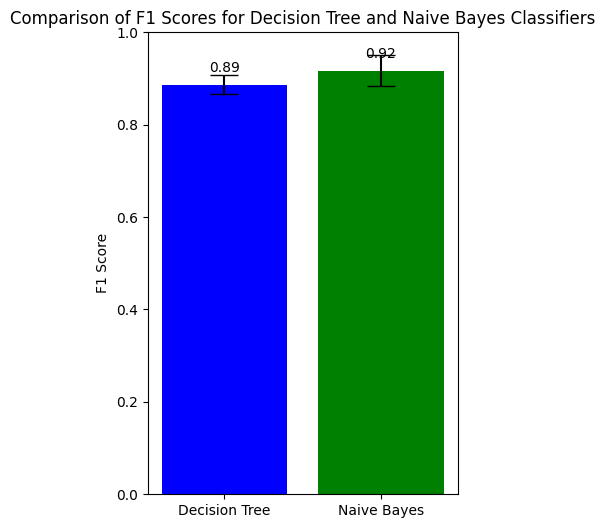

In [12]:
# Plotting F1 Scores with error bars
models = ['Decision Tree', 'Naive Bayes']
mean_f1_scores = [dt_mean_f1, nb_mean_f1]
std_f1_scores = [dt_std_f1, nb_std_f1]

plt.figure(figsize=(4, 6))
bars = plt.bar(models, mean_f1_scores, yerr=std_f1_scores, capsize=10, color=['blue', 'green'])
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores for Decision Tree and Naive Bayes Classifiers')
plt.ylim(0, 1)

# Annotate bars with mean F1 scores
for bar, mean_f1 in zip(bars, mean_f1_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{mean_f1:.2f}', ha='center', va='bottom')

plt.show()

Decision Tree has an average F1 score of 0.89, while Naive Bayes achieves 0.92.
Naive Bayes is the better model in this comparison, as shown by its higher average F1 score and consistent performance across a range of folds.

## Q2 - Dimensionality reduction with the Singular Value Decomposition (Mohamed)

Before applying SVD to the features, I first standardized the raw features so that they have a mean of 0 and standard deviation of 1. This is done since there are many feature like radius, smoothness, concavity, etc, and we want to make sure that all features are on the same scale.

Once standardized, I used the `numpy` library to perform the SVD on the standardized features matrix. The SVD decomposes the matrix into three matrices: U, Sigma, and Vt. Vt represent the directions of the features that capture the most variance. I used this matrix to project the standardized features onto the top n components.

To visualize and confirm that the approach works, I kept the top 2 singular values. I then projected the standardized features onto the first two right singular vectors (Vt) corresponding to the top 2 singular values. This reduced the number of features from 30 to 2, which allowed me to visualize the data in 2D.

I then trained the decision tree and Naive-Bayes models exactly as in Q1, to plot their performance. The F1 scores were stored in a dictionary along with the number of component to generate a final plot as a function of rank. In the end, the results showed that the models performance, generally improved as the oversampling ratio increased. Decision tree with 5 neighbors performed worse than decision tree with 1 neighbor, but Naive-Bayes performed generally better with 5 neighbors.

In [13]:
def perform_svd(X, n_components):
    # compute mean and standard deviation for each feature
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)

    # standardize data
    X_standardized = (X - X_mean) / X_std

    # Perform SVD on standardized data
    # U: left singular vectors.
    # S: singular values.
    # Vt: transposed right singular vectors.
    U, S, Vt = np.linalg.svd(X_standardized)

    # Project data onto first n_components
    X_svd = np.dot(X_standardized, Vt.T[:, :n_components])

    return X_svd, Vt[:n_components, :]


def transform_test_data(X_test, Vt, n_components):
    """
    this is so we can project test X onto the same space.
    """
    X_mean = np.mean(X_test, axis=0)
    X_std = np.std(X_test, axis=0)

    # Standardize data
    X_standardized = (X_test - X_mean) / X_std

    # Project data onto first n_components
    X_svd = np.dot(X_standardized, Vt.T[:, :n_components])
    return X_svd

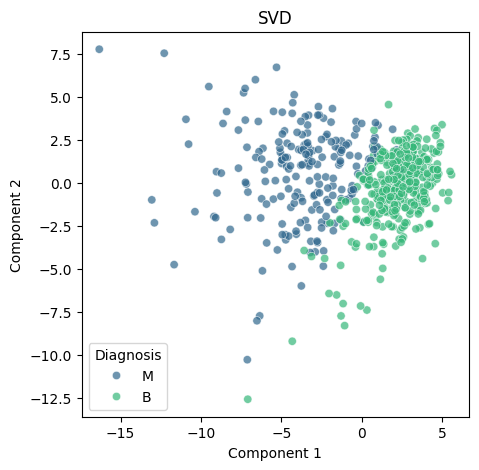

In [14]:
# testing SVD implementation in 2 dimensions for visualization.
X_train_svd, Vt = perform_svd(X, n_components=2)

plt.figure(figsize=(5, 5))
sns.scatterplot(
    x=X_train_svd[:, 0],
    y=X_train_svd[:, 1],
    hue=y['Diagnosis'],
    palette='viridis',
    alpha=0.7)
plt.title('SVD')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Diagnosis')
plt.show()

In [15]:
# hide runtime and future warnings
warnings.filterwarnings("ignore")


clf = DecisionTreeClassifier()
nb_clf = NaiveBayesClassifier()


X_train, X_test, y_train, y_test = train_test_split(X, y_bin, stratify=y, test_size=0.2, random_state=42)

# perform svd for different ranks
ranks = np.arange(2, X_train.shape[1])

# store F1 scores for each rank
f1_scores = {
    'Decision Tree': [],
    'Naive Bayes': []
}

for rank in ranks:
    print('Rank:', rank)
    # svd on training data
    X_train_svd, Vt = perform_svd(X_train, n_components=rank)

    # project test data onto the same space
    X_test_proj = transform_test_data(X_test, Vt, n_components=rank)

    # classifiers
    dt_mean_f1, dt_std_f1, dt_test_accuracy, dt_test_f1 = train_models_k_folds(
        X_train_svd,
        y_train,
        X_test_proj,
        y_test,
        DecisionTreeModel,
        skf)
    nb_mean_f1, nb_std_f1, nb_test_accuracy, nb_test_f1 = train_models_k_folds(
        X_train_svd,
        y_train,
        X_test_proj,
        y_test,
        NaiveBayesModel,
        skf)

    f1_scores['Decision Tree'].append((rank, dt_mean_f1))
    f1_scores['Naive Bayes'].append((rank, nb_mean_f1))


Rank: 2
Fold 1 F1 Score: 0.88
Fold 2 F1 Score: 0.93
Fold 3 F1 Score: 0.85
Fold 4 F1 Score: 0.93
Fold 5 F1 Score: 0.86
Mean F1 Score: 0.89, Standard Deviation: 0.03
Test Set Accuracy: 0.96, F1 Score: 0.94
Fold 1 F1 Score: 0.94
Fold 2 F1 Score: 0.96
Fold 3 F1 Score: 0.78
Fold 4 F1 Score: 0.83
Fold 5 F1 Score: 0.88
Mean F1 Score: 0.88, Standard Deviation: 0.07
Test Set Accuracy: 0.91, F1 Score: 0.88
Rank: 3
Fold 1 F1 Score: 0.89
Fold 2 F1 Score: 0.97
Fold 3 F1 Score: 0.89
Fold 4 F1 Score: 0.88
Fold 5 F1 Score: 0.91
Mean F1 Score: 0.91, Standard Deviation: 0.03
Test Set Accuracy: 0.96, F1 Score: 0.95
Fold 1 F1 Score: 0.94
Fold 2 F1 Score: 0.94
Fold 3 F1 Score: 0.82
Fold 4 F1 Score: 0.88
Fold 5 F1 Score: 0.90
Mean F1 Score: 0.89, Standard Deviation: 0.05
Test Set Accuracy: 0.89, F1 Score: 0.85
Rank: 4
Fold 1 F1 Score: 0.91
Fold 2 F1 Score: 0.96
Fold 3 F1 Score: 0.92
Fold 4 F1 Score: 0.93
Fold 5 F1 Score: 0.96
Mean F1 Score: 0.93, Standard Deviation: 0.02
Test Set Accuracy: 0.96, F1 Score: 0

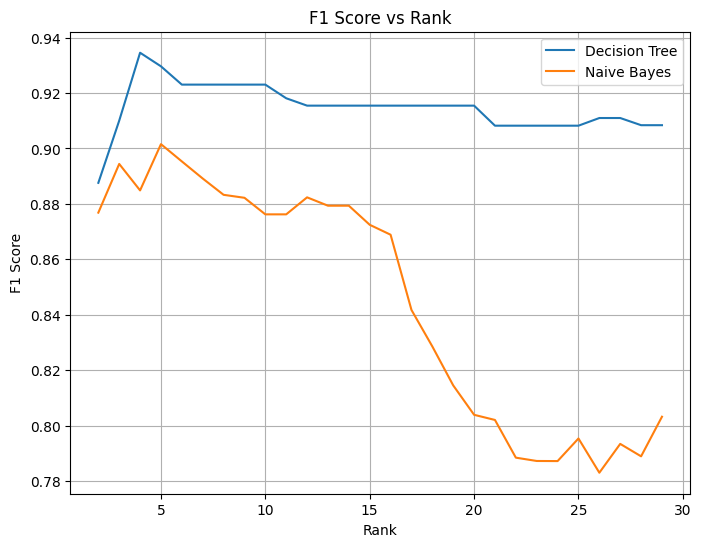

In [16]:
# plot F1 scores
plt.figure(figsize=(8, 6))

for classifier in f1_scores:
    ranks, scores = zip(*f1_scores[classifier])
    plt.plot(ranks, scores, label=classifier)

plt.xlabel('Rank')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Rank')
plt.legend()
plt.grid(True)
plt.show()

## Q3 - Feature selection with randomization (Rona)
Using a randomization technique, this code applies a feature ranking strategy to evaluate the impact of each feature on the performance of Decision Tree and Naive Bayes models. To isolate the influence of each feature, it starts with the randomize_feature helper function, which shuffles each feature separately. The class balance is then maintained during feature evaluation by using a 20% stratified sample of the data. By comparing the model's F1 score before and after shuffling, the core function feature_selection_randomization calculates the relative relevance of each feature. The decline in F1 score indicates the influence of the feature. Reliable estimates across folds are ensured via a 5-fold cross-validation method. The mean importance and variability (standard deviation) of each feature across folds are graphically displayed in a bar chart after the importance computation.

In [17]:
# helper function to shuffle a single feature column
def randomize_feature(X, feature_idx):
    """
    Shuffle a specific feature column, keeping other columns the same
    """
    X_rand = X.copy()  # make a copy to avoid changing the original data
    np.random.shuffle(X_rand[:, feature_idx])  # shuffle the selected feature
    return X_rand

In [18]:
# create a 20% stratified subset of the data for feature ranking
X_feature_sel, _, y_feature_sel, _ = train_test_split(X, y_bin, test_size=0.8, stratify=y_bin, random_state=42)

In [19]:
# function to evaluate feature importance with randomization method
def feature_selection_randomization(X, y, model, skf):
    """
    Calculate the importance of each feature by randomizing it and checking the model’s performance drop
    """
    n_features = X.shape[1]
    feature_importance = np.zeros((skf.get_n_splits(), n_features))  # store importance scores across folds

    for fold_idx, (train_index, test_index) in enumerate(skf.split(X, y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        for feature_idx in range(n_features):
            # Shuffle one feature at a time
            X_rand = randomize_feature(X_train.copy(), feature_idx)

            # Original and randomized performance (F1 score)
            orig_mean_f1, _, _, _ = train_models_k_folds(X_train, y_train, X_test, y_test, model, skf, verbose=False)
            rand_mean_f1, _, _, _ = train_models_k_folds(X_rand, y_train, X_test, y_test, model, skf, verbose=False)

            # Calculate the drop in F1 score as importance
            drop = ((orig_mean_f1 - rand_mean_f1) / orig_mean_f1) * 100
            feature_importance[fold_idx, feature_idx] = drop

    # Calculate mean ± std for each feature's importance
    mean_importance = feature_importance.mean(axis=0)
    std_importance = feature_importance.std(axis=0)
    return mean_importance, std_importance


In [20]:
# set up 5-fold cross-validation for feature selection
skf_5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# feature importance for Decision Tree and Naive Bayes
mean_importance_dt, std_importance_dt = feature_selection_randomization(X_feature_sel, y_feature_sel, DecisionTreeModel, skf_5)
mean_importance_nb, std_importance_nb = feature_selection_randomization(X_feature_sel, y_feature_sel, NaiveBayesModel, skf_5)


Fold 1 F1 Score: 0.62
Fold 2 F1 Score: 0.82
Fold 3 F1 Score: 0.83
Fold 4 F1 Score: 0.80
Fold 5 F1 Score: 0.83
Fold 1 F1 Score: 0.71
Fold 2 F1 Score: 0.82
Fold 3 F1 Score: 0.83
Fold 4 F1 Score: 0.80
Fold 5 F1 Score: 0.83
Fold 1 F1 Score: 0.62
Fold 2 F1 Score: 0.82
Fold 3 F1 Score: 0.83
Fold 4 F1 Score: 0.80
Fold 5 F1 Score: 0.83
Fold 1 F1 Score: 0.62
Fold 2 F1 Score: 0.82
Fold 3 F1 Score: 0.83
Fold 4 F1 Score: 0.77
Fold 5 F1 Score: 0.83
Fold 1 F1 Score: 0.62
Fold 2 F1 Score: 0.82
Fold 3 F1 Score: 0.83
Fold 4 F1 Score: 0.80
Fold 5 F1 Score: 0.83
Fold 1 F1 Score: 0.67
Fold 2 F1 Score: 0.82
Fold 3 F1 Score: 0.83
Fold 4 F1 Score: 0.80
Fold 5 F1 Score: 0.83
Fold 1 F1 Score: 0.62
Fold 2 F1 Score: 0.82
Fold 3 F1 Score: 0.83
Fold 4 F1 Score: 0.80
Fold 5 F1 Score: 0.83
Fold 1 F1 Score: 0.62
Fold 2 F1 Score: 0.82
Fold 3 F1 Score: 0.83
Fold 4 F1 Score: 0.80
Fold 5 F1 Score: 0.83
Fold 1 F1 Score: 0.62
Fold 2 F1 Score: 0.82
Fold 3 F1 Score: 0.83
Fold 4 F1 Score: 0.80
Fold 5 F1 Score: 0.83
Fold 1 F1 

In order to evaluate the influence on runtime, the number of splits in cross-validation was temporarily reduced to two. The runtime was around 8 minutes with 5 splits and 48 seconds with 2 splits. This demonstrates that a significant factor in the longer duration was 5-fold cross-validation. In order to balance accuracy and computing efficiency, a faster iteration was made possible by temporarily adjusting the divides.

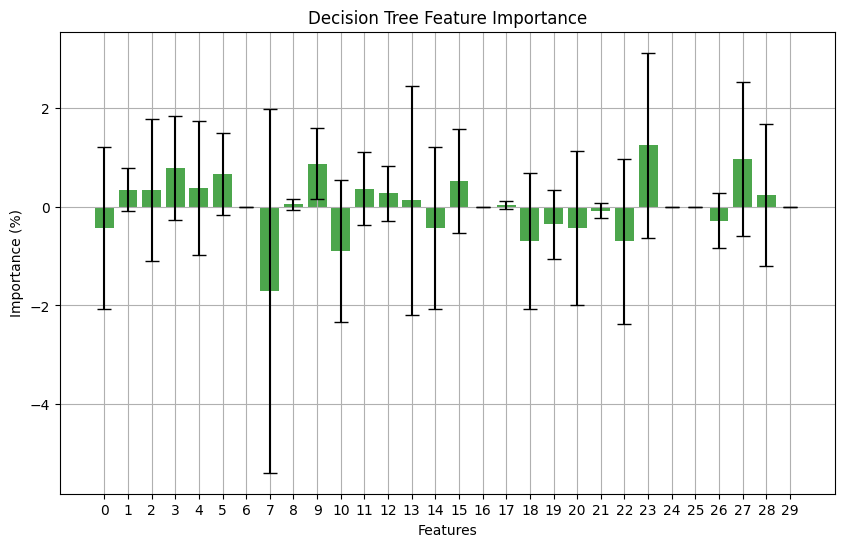

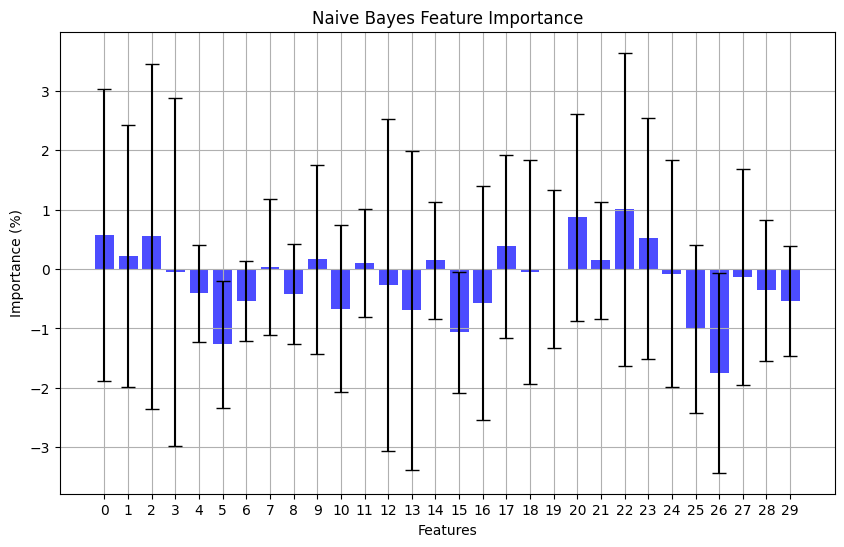

In [23]:
# Plot feature importance
def plot_feature_importance(mean_importance, std_importance, title="Feature Importance Ranking", color='blue'):
    plt.figure(figsize=(10, 6))
    features = range(len(mean_importance))
    plt.bar(features, mean_importance, yerr=std_importance, align='center', alpha=0.7, capsize=5, color=color)
    plt.xlabel('Features')
    plt.ylabel('Importance (%)')
    plt.title(title)
    plt.xticks(features)
    plt.grid(True)
    plt.show()

# Plot feature importance for both models
plot_feature_importance(mean_importance_dt, std_importance_dt, title="Decision Tree Feature Importance", color='green')
plot_feature_importance(mean_importance_nb, std_importance_nb, title="Naive Bayes Feature Importance", color='blue')


In [24]:
# get the top 10 features based on mean importance score
top_10_features_dt = np.argsort(-mean_importance_dt)[:10]
top_10_features_nb = np.argsort(-mean_importance_nb)[:10]

# use the remaining 80% of data for evaluation
X_eval, _, y_eval, _ = train_test_split(X, y_bin, test_size=0.2, stratify=y_bin, random_state=42)


In [25]:
# set up 10-fold cross-validation for evaluation
skf_10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# evaluate Decision Tree and Naive Bayes with all features and top 10 features
# all features
all_features_f1_dt, _, _, _ = train_models_k_folds(X_eval, y_eval, X_eval, y_eval, DecisionTreeModel, skf_10)
all_features_f1_nb, _, _, _ = train_models_k_folds(X_eval, y_eval, X_eval, y_eval, NaiveBayesModel, skf_10)

# Only top 10 features
X_top_10_dt = X_eval[:, top_10_features_dt]
X_top_10_nb = X_eval[:, top_10_features_nb]
top_10_features_f1_dt, _, _, _ = train_models_k_folds(X_top_10_dt, y_eval, X_top_10_dt, y_eval, DecisionTreeModel, skf_10)
top_10_features_f1_nb, _, _, _ = train_models_k_folds(X_top_10_nb, y_eval, X_top_10_nb, y_eval, NaiveBayesModel, skf_10)

# Print results
print("\nDecision Tree Model:")
print("Mean F1 with all features:", all_features_f1_dt)
print("Mean F1 with top 10 features:", top_10_features_f1_dt)

print("\nNaive Bayes Model:")
print("Mean F1 with all features:", all_features_f1_nb)
print("Mean F1 with top 10 features:", top_10_features_f1_nb)


Fold 1 F1 Score: 0.97
Fold 2 F1 Score: 0.88
Fold 3 F1 Score: 0.79
Fold 4 F1 Score: 0.97
Fold 5 F1 Score: 0.89
Fold 6 F1 Score: 0.83
Fold 7 F1 Score: 0.88
Fold 8 F1 Score: 0.89
Fold 9 F1 Score: 0.94
Fold 10 F1 Score: 0.91
Mean F1 Score: 0.90, Standard Deviation: 0.05
Test Set Accuracy: 1.00, F1 Score: 1.00
Fold 1 F1 Score: 0.97
Fold 2 F1 Score: 0.90
Fold 3 F1 Score: 0.97
Fold 4 F1 Score: 0.97
Fold 5 F1 Score: 0.86
Fold 6 F1 Score: 0.91
Fold 7 F1 Score: 0.81
Fold 8 F1 Score: 0.94
Fold 9 F1 Score: 0.89
Fold 10 F1 Score: 0.90
Mean F1 Score: 0.91, Standard Deviation: 0.05
Test Set Accuracy: 0.95, F1 Score: 0.92
Fold 1 F1 Score: 0.88
Fold 2 F1 Score: 0.88
Fold 3 F1 Score: 0.94
Fold 4 F1 Score: 1.00
Fold 5 F1 Score: 0.88
Fold 6 F1 Score: 0.97
Fold 7 F1 Score: 0.85
Fold 8 F1 Score: 0.94
Fold 9 F1 Score: 1.00
Fold 10 F1 Score: 0.94
Mean F1 Score: 0.93, Standard Deviation: 0.05
Test Set Accuracy: 1.00, F1 Score: 1.00
Fold 1 F1 Score: 0.90
Fold 2 F1 Score: 0.85
Fold 3 F1 Score: 0.82
Fold 4 F1 Sco

Strong performance was achieved with both models when only the top ten features were used. The Naive Bayes model's F1 score increased slightly from 0.91 to 0.93, while the Decision Tree model's improved from 0.90 to 0.94. This suggests that the most significant predictive information is captured by the top 10 features, simplifying and improving the models. Overall, accuracy and stability are maintained throughout data splits when these particular features are used.

## Q4 - Data augmentation using SMOTE (Mohamed)

Since SMOTE relies on finding nearest neighbors, I first defined a nearest neighbors class that takes in the number of neighbors and returns the indexes of the neighbors. Then, in the SMOTE function, I found the nearest neighbors for each sample in the minority class and generated synthetic samples by drawing a vector connecting the sample and its neighbors, and finally creating synthetic samples along this vector.

The resulting augmented dataset was then used to train the decision tree and Naive-Bayes models. The F1 scores were stored in a dictionary along with the number of neighbors to generate a final plot as a function of the number of neighbors. The final plot shows that the performance (F1) of both models, generally increase as the sampling ratio increases.

In [26]:
'''
What to implement: As we saw in class, SMOTE is one of the earliest and very successful data augmentation (or minority class oversampling) techniques. You can use the pseudocode included in the original SMOTE paper [2] as a basis for your implementation.

What to plot: The performance of your classifiers as a function of the percentage of oversampled minority samples (100%, 200%, 300%) for k = 1, and k = 5. This plot should contain 2 lines per classifier (one for each k).
'''

class NearestNeighbors:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.data = None

    def fit(self, X):
        self.data = X

    def kneighbors(self, X):
        neighbors = []
        for x in X:
            # Euclidean distance between x and neighbors
            distances = np.sqrt(np.sum((self.data - x) ** 2, axis=1))
            # the indeces of the nearest neighbors
            nearest_idx = np.argsort(distances)
            # exlude the first element which is the point itself
            nearest_idx = nearest_idx[1:self.n_neighbors + 1]
            neighbors.append(nearest_idx)

        return np.array(neighbors)

In [27]:
def smote(X, y, oversampling_ratio=1.0, k_neighbors=5):
    """
    CS 235 lecture slides:
    Week 3 Supervised Model Evluation (slide 84)

    Class B (0) counts = 357
    Class M (1) counts = 212
    """

    # only the samples from the minority class.
    X_minority = X[y == 1]
    # print('lengt of X_minority:', len(X_minority))

    n_minority = len(X_minority)

    # number of synthetic samples to generate is
    n_synthetic = int(oversampling_ratio * n_minority)

    # find k-nearest neighbors for each minority instance
    nn = NearestNeighbors(n_neighbors=k_neighbors)
    nn.fit(X_minority)
    neighbors = nn.kneighbors(X_minority)
    # print('Neighbors:\n', neighbors)

    # generate synthetic samples
    synthetic_samples = []
    for _ in range(n_synthetic):
        # Randomly choose an index from the minority class
        idx = np.random.randint(0, n_minority)
        # Pick a random neighbor from the nearest neighbors
        neighbor_idx = np.random.choice(neighbors[idx])

        # Compute the difference vector between the selected point and its neighbor
        diff = X_minority[neighbor_idx] - X_minority[idx]
        # Generate a random number between 0 and 1, and use it to create a synthetic sample
        synthetic_sample = X_minority[idx] + np.random.rand() * diff

        synthetic_samples.append(synthetic_sample)

    X_synthetic = np.array(synthetic_samples)
    y_synthetic = np.array([1] * n_synthetic)

    # combine original and synthetic samples
    X_combined = np.vstack((X, X_synthetic))
    y_combined = np.hstack((y, y_synthetic))
    return X_combined, y_combined


In [28]:
'''The performance of your classifiers as a function of the percentage of oversampled minority samples (100%, 200%, 300%) for k = 1, and k = 5. This plot should contain 2 lines per classifier (one for each k).'''

X_train, X_test, y_train, y_test = train_test_split(X, y_bin, stratify=y, test_size=0.2, random_state=42)

k_neighbors = [1, 5]
oversampling_ratios = [1, 2, 3]

# store F1 scores for each k and oversampling ratio
f1_scores = {
    'Decision Tree': {1: [], 5: []},
    'Naive Bayes': {1: [], 5: []}
}

for k in k_neighbors:
    for ratio in oversampling_ratios:
        print(f'\n------ k = {k}, Oversampling Ratio = {ratio} ------')
        X_new, y_new = smote(X_train, y_train, oversampling_ratio=ratio, k_neighbors=k)

        # train models
        dt_mean_f1, dt_std_f1, dt_test_accuracy, dt_test_f1 = train_models_k_folds(
            X_new,
            y_new,
            X_test,
            y_test,
            DecisionTreeModel,
            skf,
            verbose=False
        )

        nb_mean_f1, nb_std_f1, nb_test_accuracy, nb_test_f1 = train_models_k_folds(
            X_new,
            y_new,
            X_test,
            y_test,
            NaiveBayesModel,
            skf,
            verbose=False
        )

        f1_scores['Decision Tree'][k].append((ratio, dt_mean_f1))
        f1_scores['Naive Bayes'][k].append((ratio, nb_mean_f1))


------ k = 1, Oversampling Ratio = 1 ------
Fold 1 F1 Score: 0.90
Fold 2 F1 Score: 0.96
Fold 3 F1 Score: 0.96
Fold 4 F1 Score: 0.96
Fold 5 F1 Score: 0.98
Fold 1 F1 Score: 0.93
Fold 2 F1 Score: 0.95
Fold 3 F1 Score: 0.96
Fold 4 F1 Score: 0.98
Fold 5 F1 Score: 0.91

------ k = 1, Oversampling Ratio = 2 ------
Fold 1 F1 Score: 0.94
Fold 2 F1 Score: 0.94
Fold 3 F1 Score: 0.98
Fold 4 F1 Score: 0.98
Fold 5 F1 Score: 0.98
Fold 1 F1 Score: 0.94
Fold 2 F1 Score: 0.89
Fold 3 F1 Score: 0.97
Fold 4 F1 Score: 0.97
Fold 5 F1 Score: 0.95

------ k = 1, Oversampling Ratio = 3 ------
Fold 1 F1 Score: 0.97
Fold 2 F1 Score: 0.99
Fold 3 F1 Score: 0.98
Fold 4 F1 Score: 0.98
Fold 5 F1 Score: 0.98
Fold 1 F1 Score: 0.95
Fold 2 F1 Score: 0.97
Fold 3 F1 Score: 0.94
Fold 4 F1 Score: 0.95
Fold 5 F1 Score: 0.95

------ k = 5, Oversampling Ratio = 1 ------
Fold 1 F1 Score: 0.91
Fold 2 F1 Score: 0.93
Fold 3 F1 Score: 0.96
Fold 4 F1 Score: 0.97
Fold 5 F1 Score: 0.96
Fold 1 F1 Score: 0.93
Fold 2 F1 Score: 0.95
Fold 3

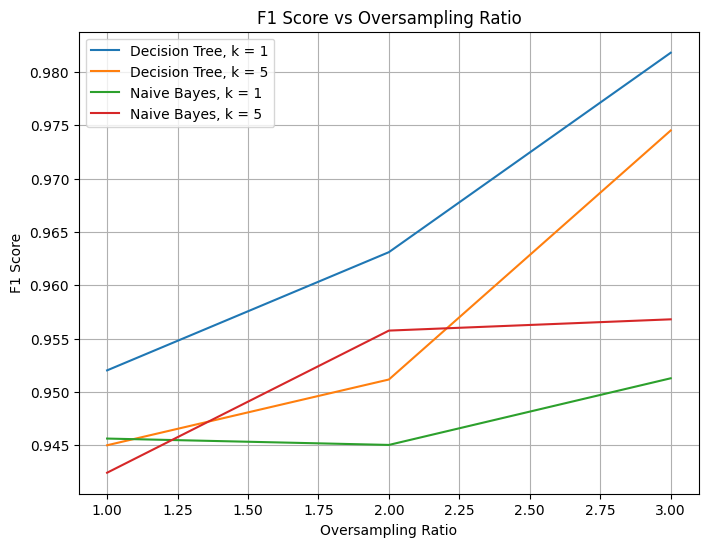

In [29]:
# plot performance
plt.figure(figsize=(8, 6))

for classifier in f1_scores:
    for k in f1_scores[classifier]:
        ratios, scores = zip(*f1_scores[classifier][k])
        plt.plot(ratios, scores, label=f'{classifier}, k = {k}')

plt.xlabel('Oversampling Ratio')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Oversampling Ratio')
plt.legend()
plt.grid(True)

plt.show()